In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Original Draft Data

master_data = pd.read_csv("../starting file/Draft_SD_CSV.csv")

C:\Users\daily\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Creating WAR Group Column

master_data.loc[(master_data["Total_WAR"] < 5), "WAR Group"] = "Less than 5 WAR"
master_data.loc[(master_data["Total_WAR"] < 10) & (master_data["Total_WAR"] >= 5), "WAR Group"] = "5-10 WAR"
master_data.loc[(master_data["Total_WAR"] < 15) & (master_data["Total_WAR"] >= 10), "WAR Group"] = "10-15 WAR"
master_data.loc[(master_data["Total_WAR"] < 20) & (master_data["Total_WAR"] >= 15), "WAR Group"] = "15-20 WAR"
master_data.loc[(master_data["Total_WAR"] < 25) & (master_data["Total_WAR"] >= 20), "WAR Group"] = "20-25 WAR"
master_data.loc[(master_data["Total_WAR"] >= 25), "WAR Group"] = "More than 25 WAR"
master_data["WAR Group"].fillna("No Major League Experience", inplace = True)

In [4]:
#Limiting the data to only Mets players

mets_data = master_data.loc[master_data["Franchise"] == "Mets"]

#Only showing players that signed with the Mets

signed_mets_data = mets_data.loc[mets_data["Signed"] == "Y"]

#Grouped by draft class

draft_class_year = signed_mets_data.groupby("Year")

#Unsigned Mets draft picks

unsigned_mets_data = mets_data.loc[mets_data["Signed"] == "N"]

In [5]:
#Total WAR by draft class sorted by best to worst

draft_class_year["Total_WAR"].sum().sort_values(ascending = False)

Year
1982    61.4
2010    50.0
2001    39.6
1980    35.0
1983    34.2
1965    33.3
1967    28.9
2005    27.6
1990    26.2
1987    24.4
1981    23.4
2011    23.2
1991    21.9
1994    21.1
2002    20.9
1977    20.8
2008    19.3
1978    16.5
1995    16.2
1985    14.5
2014    14.1
2006    14.0
1999    13.0
1976    12.8
1968    12.4
1973    11.7
1966    11.6
1972    10.5
1992     9.5
2007     7.6
2009     6.7
2013     6.2
1998     6.0
2003     5.5
2016     5.3
1979     5.2
1989     5.2
2004     4.4
1969     2.7
1993     2.4
1996     1.0
1986     0.9
2000     0.8
1970     0.6
1971     0.1
2017     0.0
2018     0.0
2019     0.0
1984    -0.1
2015    -0.2
2012    -0.2
1975    -0.3
1974    -0.4
1988    -1.0
1997    -3.0
Name: Total_WAR, dtype: float64

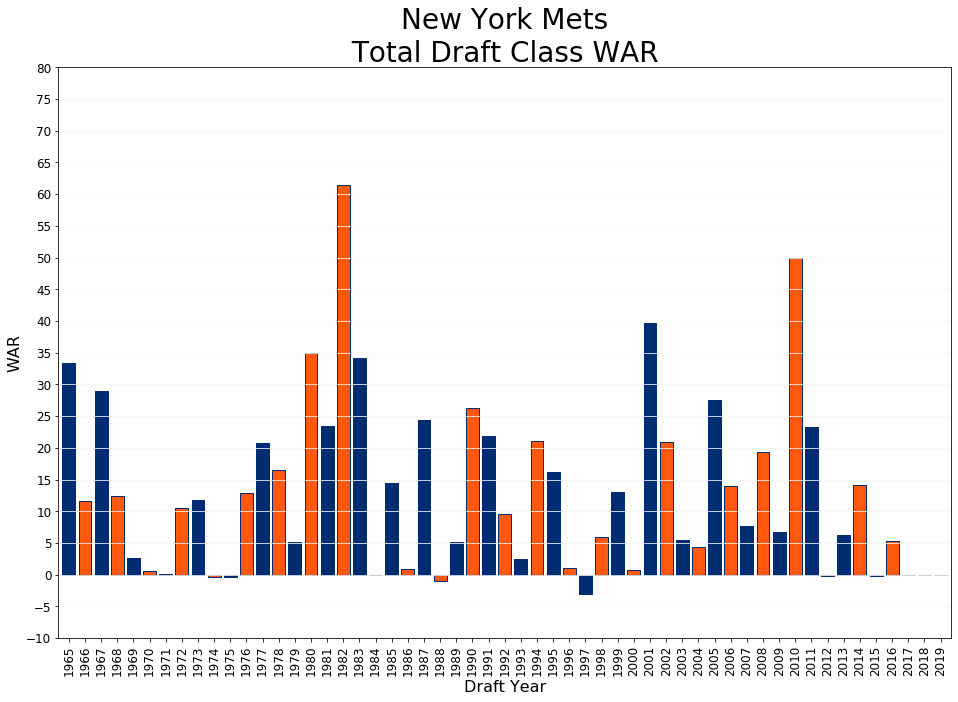

In [6]:
#WAR by draft class year bargraph

draft_class_year["Total_WAR"].sum().plot(kind = "bar", color = ["#002D72", "#FF5910"], width = .8, fontsize = 12, edgecolor = "#002D72", figsize = (16, 10.5))
plt.title("New York Mets\n Total Draft Class WAR ", size = 28)
plt.xlabel("Draft Year", size = 16)
plt.ylabel("WAR", size = 16)
plt.yticks(np.arange(-10, 81, step = 5))
plt.grid(color = "whitesmoke", linestyle = "-", axis = "y")
plt.savefig("Mets WAR Total by Draft Year.png")
plt.show()

In [7]:
#Best draft picks in franchise history

signed_mets_data.sort_values(["Total_WAR"],ascending = False).head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
14042,1982,1,5,Mets,Mets,Y,Dwight Gooden,1984.0,goodedw01,1004852.0,2.0,41.1,43.1,RHP,HS,Hillsborough HS,Tampa,FL,More than 25 WAR
39786,2001,1,38,Mets,Mets,Y,David Wright,2004.0,wrighda03,3787.0,34.8,0.0,34.8,3B,HS,Hickory HS,Chesapeake,VA,More than 25 WAR
53446,2010,9,272,Mets,Mets,Y,Jacob deGrom,2014.0,degroja01,10954.0,2.2,31.5,33.7,RHP,4Yr,Stetson University,DeLand,FL,More than 25 WAR
1658,1967,1,4,Mets,Mets,Y,Jon Matlack,1971.0,matlajo01,1008246.0,0.4,29.1,29.5,LHP,HS,Henderson HS,West Chester,PA,More than 25 WAR
12353,1980,1,1,Mets,Mets,Y,Darryl Strawberry,1983.0,strawda01,1012606.0,29.0,0.0,29.0,OF,HS,Crenshaw HS,Los Angeles,CA,More than 25 WAR
13499,1981,13,315,Mets,Mets,Y,Lenny Dykstra,1985.0,dykstle01,1003619.0,25.4,0.0,25.4,OF,HS,Garden Grove HS,Garden Grove,CA,More than 25 WAR
30585,1995,8,217,Mets,Mets,Y,A.J. Burnett,1999.0,burnea.01,512.0,0.3,15.8,16.1,RHP,HS,Central Arkansas Christian HS,North Little Rock,AR,15-20 WAR
41248,2002,1,15,Mets,Mets,Y,Scott Kazmir,2004.0,kazmisc01,4897.0,-0.1,16.2,16.1,LHP,HS,Cypress Falls HS,Houston,TX,15-20 WAR
14900,1983,2,32,Mets,Mets,Y,Dave Magadan,1986.0,magadda01,1007961.0,15.8,0.0,15.8,1B,4Yr,University of Alabama,Tuscaloosa,AL,15-20 WAR
22460,1990,1,17,Mets,Mets,Y,Jeromy Burnitz,1993.0,burnije01,867.0,14.8,0.0,14.8,OF,4Yr,Oklahoma State University,Stillwater,OK,10-15 WAR


In [8]:
#Biggest draft busts found by looking at first rounders who had less than 5 WAR or didn't make majors

signed_mets_data.loc[((signed_mets_data["WAR Group"] == "Less than 5 WAR") |
(signed_mets_data["WAR Group"] == "No Major League Experience")) & 
(signed_mets_data["Rnd"] == 1)]

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
1,1965,1,2,Mets,Mets,Y,Les Rohr,1967.0,rohrle01,1011148.0,0.0,0.2,0.2,LHP,HS,Billings West HS,Billings,MT,Less than 5 WAR
824,1966,1,1,Mets,Mets,Y,Steven Chilcott,NaN,NaN,NaN,NaN,NaN,NaN,C,HS,Antelope Valley HS,Lancaster,CA,No Major League Experience
2630,1968,1,1,Mets,Mets,Y,Tim Foli,1970.0,foliti01,1004202.0,4.1,0.0,4.1,SS,HS,Notre Dame HS,Sherman Oaks,CA,Less than 5 WAR
3545,1969,1,4,Mets,Mets,Y,Randy Sterling,1974.0,sterlra01,1012504.0,0.0,0.1,0.1,RHP,HS,Key West HS,Key West,FL,Less than 5 WAR
5524,1971,1,14,Mets,Mets,Y,Rich Puig,1974.0,puigri01,1010563.0,-0.3,0.0,-0.3,2B,HS,Hillsborough HS,Tampa,FL,Less than 5 WAR
6324,1972,1,13,Mets,Mets,Y,Richard Bengston,NaN,NaN,NaN,NaN,NaN,NaN,C,HS,Richwoods HS,Peoria,IL,No Major League Experience
7866,1974,1,17,Mets,Mets,Y,Cliff Speck,1986.0,speckcl01,1012310.0,0.0,0.1,0.1,RHP,HS,Beaverton HS,Beaverton,OR,Less than 5 WAR
8542,1975,1,6,Mets,Mets,Y,Butch Benton,1978.0,bentobu01,1000854.0,-0.3,0.0,-0.3,C,HS,Godby HS,Tallahassee,FL,Less than 5 WAR
9228,1976,1,13,Mets,Mets,Y,Tom Thurberg,NaN,NaN,NaN,NaN,NaN,NaN,OF,HS,South Weymouth HS,Weymouth,MA,No Major League Experience
11484,1979,1,2,Mets,Mets,Y,Tim Leary,1981.0,learyti01,1007438.0,0.6,4.0,4.6,RHP,4Yr,University of California Los Angeles,Los Angeles,CA,Less than 5 WAR


In [9]:
#Best unsigned draft picks in franchise history

unsigned_mets_data.sort_values(["Total_WAR"],ascending = False).head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
13473,1981,12,289,Mets,Mets,N,Roger Clemens,1984.0,clemero02,815.0,0.0,43.7,43.7,RHP,JC,San Jacinto College,Pasadena,TX,More than 25 WAR
1183,1966,19,361,Mets,Mets,N,Ron Cey,1971.0,ceyro01,1002108.0,26.7,0.0,26.7,3B,HS,Mount Tahoma HS,Tacoma,WA,More than 25 WAR
2714,1968,5,85,Mets,Mets,N,Burt Hooton,1971.0,hootobu01,1006005.0,-1.2,24.6,23.4,RHP,HS,King HS,Corpus Christi,TX,20-25 WAR
25886,1992,13,357,Mets,Mets,N,Darin Erstad,1996.0,erstada01,11.0,22.4,0.0,22.4,OF,HS,Jamestown HS,Jamestown,ND,20-25 WAR
18048,1986,27,682,Mets,Mets,N,John Olerud,1989.0,olerujo01,1093.0,20.5,0.0,20.5,1B,HS,Interlake HS,Bellevue,WA,20-25 WAR
15532,1983,27,664,Mets,Mets,N,Matt Williams,1987.0,willima04,77.0,20.3,0.0,20.3,3B,HS,Carson City HS,Carson City,NV,20-25 WAR
31481,1995,40,1113,Mets,Mets,N,Aaron Rowand,2001.0,rowanaa01,254.0,19.7,0.0,19.7,SS,HS,Glendora HS,Glendora,CA,15-20 WAR
14226,1982,8,189,Mets,Mets,N,Rafael Palmeiro,1986.0,palmera01,1266.0,18.9,0.0,18.9,OF,HS,Jackson HS,Miami,FL,15-20 WAR
18187,1986,36,821,Mets,Mets,N,Scott Erickson,1990.0,ericksc01,137.0,0.0,18.4,18.4,RHP,HS,Homestead HS,Sunnyvale,CA,15-20 WAR
35051,1997,43,1281,Mets,Mets,N,David DeJesus,2003.0,dejesda01,1825.0,17.2,0.0,17.2,OF,HS,Manalapan HS,Englishtown,NJ,15-20 WAR


In [10]:
#Best Draft Picks outside the top 10 rounds

hidden_gems = signed_mets_data.loc[signed_mets_data["Rnd"] > 10].sort_values("Total_WAR", ascending = False)

hidden_gems.head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
13499,1981,13,315,Mets,Mets,Y,Lenny Dykstra,1985.0,dykstle01,1003619.0,25.4,0.0,25.4,OF,HS,Garden Grove HS,Garden Grove,CA,More than 25 WAR
619,1965,24,620,Mets,Mets,Y,Steve Renko,1969.0,renkost01,1010835.0,3.0,9.1,12.1,1B,4Yr,University of Kansas,Lawrence,KS,10-15 WAR
47588,2006,13,394,Mets,Mets,Y,Daniel Murphy,2008.0,murphda08,4316.0,11.4,0.0,11.4,3B,4Yr,Jacksonville University,Jacksonville,FL,10-15 WAR
50703,2008,18,554,Mets,Mets,Y,Collin McHugh,2012.0,mchugco01,7531.0,-0.2,11.5,11.3,RHP,4Yr,Berry College,Mount Berry,GA,10-15 WAR
2929,1968,14,301,Mets,Mets,Y,John Milner,1971.0,milnejo01,1008965.0,9.6,0.0,9.6,OF,HS,South Fulton HS,East Point,GA,5-10 WAR
294,1965,12,295,Mets,Mets,Y,Nolan Ryan,1966.0,ryanno01,1011348.0,-0.4,9.4,9.0,RHP,HS,Alvin HS,Alvin,TX,5-10 WAR
57823,2013,12,356,Mets,Mets,Y,Jeff McNeil,2018.0,mcneije01,15362.0,7.3,0.0,7.3,SS,4Yr,California State University Long Beach,Long Beach,CA,5-10 WAR
244,1965,11,245,Mets,Mets,Y,Jim McAndrew,1968.0,mcandji01,1008328.0,-0.4,7.6,7.2,RHP,4Yr,University of Iowa,Iowa City,IA,5-10 WAR
25086,1991,44,1157,Mets,Mets,Y,Jason Isringhausen,1995.0,isrinja01,1158.0,0.6,6.5,7.1,RHP,JC,Lewis & Clark Community College,Godfrey,IL,5-10 WAR
55731,2011,34,1032,Mets,Mets,Y,Seth Lugo,2016.0,lugose01,12447.0,0.3,5.7,6.0,RHP,4Yr,Centenary College of Louisiana,Shreveport,LA,5-10 WAR


In [11]:
#Creating table for percentage of picks by school type

draft_year_school_table_pct = pd.crosstab(mets_data["Year"], mets_data["Type"], normalize = "index")

100 * round(draft_year_school_table_pct,3)

Type,4Yr,HS,JC
Year,,,
1965,45.1,51.0,3.9
1966,50.0,40.4,9.6
1967,18.6,78.0,3.4
1968,20.5,72.7,6.8
1969,26.9,71.2,1.9
1970,26.8,65.9,7.3
1971,14.3,80.0,5.7
1972,28.9,64.4,6.7
1973,38.9,52.8,8.3


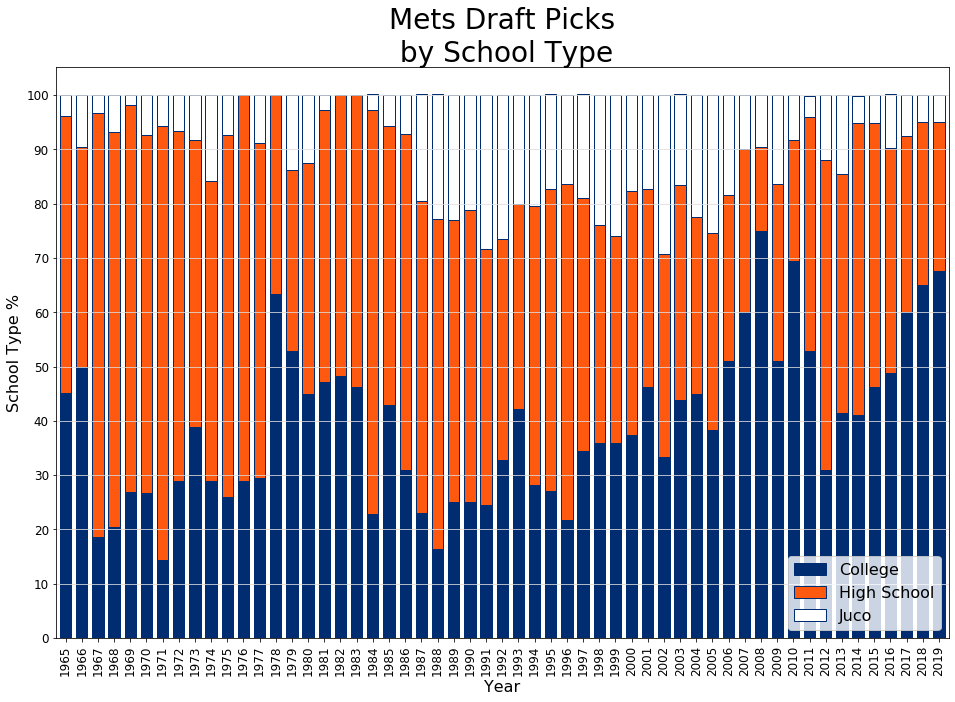

In [12]:
#Bar chart of table above

colors = ["#002D72", "#FF5910", "white"]

(100 * round(draft_year_school_table_pct,3)).plot(kind = "bar", color = colors, width = .7, fontsize = 12, 
edgecolor = "#002D72", stacked = True, figsize = (16, 10.5))
plt.title("Mets Draft Picks\n by School Type", size = 28)
plt.xlabel("Year", size = 16)
plt.ylabel("School Type %", size = 16)
plt.yticks(np.arange(0, 101, step = 10))
plt.legend(["College", "High School", "Juco"], loc = "lower right", fontsize = 16)
plt.grid(color = "gainsboro", linestyle = "-", axis = "y")
plt.savefig("Mets Draft Picks by School Type.png")
plt.show()